In [3]:
import pandas as pd
import csv # 打开csv文件
import jieba # 中文分词
import wordcloud # 词云图绘制
from PIL import Image # 用于打开词云背景图片
import numpy as np # 用于将图片转化为数组

In [4]:
with open('长相思豆瓣.csv','r',encoding='utf-8') as f:
    danmus_list=list(csv.reader(f))
# print(type(danmus_list))

In [5]:
danmus_clean1=[str(danmus_list).replace(' ','')]
# print(danmus_clean1)

In [6]:
danmus_seg=''.join(danmus_clean1) # 将文本数据转换为字符串格式
words=list(jieba.lcut(danmus_seg)) # 利用jieba库进行分词
print(type(words),words)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.027 seconds.
DEBUG:jieba:Loading model cost 1.027 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


<class 'list'> ['[', '[', "'", '评论', '内容', "'", ']', ',', '[', "'", '上古', '《', '布里奇顿', '》', '，', '几', '对', '二代', '祖哥妹', '的', '联姻', '社交', '季', '（', '从此', '恐哥妹', '了', '…', '…', '…', '…', '…', '薅', '，', '窝素', '相柳', '大人', '单推', '、', '、', '、', '檀', '老师', '非常', '好', '、', '、', "'", ']', ',', '[', "'", '弃剧', '：', '看到', '第三集', '，', '感觉', '这', '剧情', '和', '魔幻', '仙侠', '设定', '实在', '是', '没法', '入戏', '。', "'", ']', ',', '[', "'", '没什么', '特别', '能', '说', '的', '了', '，', '也', '找', '不到', '能', '评价', '的话', '了', '，', '谢谢', '檀健次', '演', '了', '相柳', '，', '谢谢', '。', "'", ']', ',', '[', "'", '这个', '故事', '设定', '十分', '诡异', '。', '男一', '主要', '负责', '给', '女主', '提供', '物质', '保障', '和', '生命安全', '，', '男二', '主要', '负责', '给', '女主', '提供', '情感', '价值', '和', '陪伴', '功能', '，', '男三', '主要', '负责', '给', '女主加', '武力', '值和空', '档期', '解闷', '…', '男四', '主要', '为了', '烘托', '其他', '几个', '男人', '并且', '最后', '挂', '了', '。', '看似', '核心', '价值', '描述', '十分', '物化', '里面', '的', '女性', '角色', '（', '经常', '拿来', '做', '仕途', '交换', '）', '但', '实际上', '，', '作者', '本身', '也', '

In [7]:
danmus_clean2 = [word for word in words if len(word)>1] # 保留长度>1的变量
print(danmus_clean2)

['评论', '内容', '上古', '布里奇顿', '二代', '祖哥妹', '联姻', '社交', '从此', '恐哥妹', '窝素', '相柳', '大人', '单推', '老师', '非常', '弃剧', '看到', '第三集', '感觉', '剧情', '魔幻', '仙侠', '设定', '实在', '没法', '入戏', '没什么', '特别', '不到', '评价', '的话', '谢谢', '檀健次', '相柳', '谢谢', '这个', '故事', '设定', '十分', '诡异', '男一', '主要', '负责', '女主', '提供', '物质', '保障', '生命安全', '男二', '主要', '负责', '女主', '提供', '情感', '价值', '陪伴', '功能', '男三', '主要', '负责', '女主加', '武力', '值和空', '档期', '解闷', '男四', '主要', '为了', '烘托', '其他', '几个', '男人', '并且', '最后', '看似', '核心', '价值', '描述', '十分', '物化', '里面', '女性', '角色', '经常', '拿来', '仕途', '交换', '实际上', '作者', '本身', '十分', '功能化', '一个', '男性', '角色', '导致', '一个', '角色行为', '动机', '性格', '及其', '所在', '世界', '世界观', '十分', '割裂', '另外', '这个', '故事', '有前', '黄晓明', '宋茜演', '上古', '情歌', '制作', '大女', '主大', 'IP', '演员', '演员', '没拉垮', '说出', '一直', '一个', '小六好', '心疼', '早就', '三百年', '分崩离析', '555', '真的', '还原', '原著', '张晚', '意演', '眼神', '真的', '很绝', '天天', '微博抖', '音刷', '为了', '邓为', '还充', '一个月', '腾讯', '会员', '一集', '第一集', '看到', '最后', '一集', '非常', '还原', '小说', '一看', '编剧', '就是', '桐大', '本人', '三大', 

In [8]:
with open('cn_stopwords.txt','r',encoding='utf-8') as sw:
    stopwords_list=list(csv.reader(sw)) # 打开停用词表并转换为列表格式
outstr='' # 设置空字符串，用于储存停用词表过滤后的分词
for word in danmus_clean2: # 遍历分词后列表中的每一个单词
    if word not in stopwords_list: # 如果单词不在停用词表中
        if word != '\t': # 如果单词不为制表符
            outstr += word # 将该单词加入字符串中
            outstr += ' ' # 将结果以空格隔开
result=outstr.split() # 将结果转换为list格式
print(type(result),result)

<class 'list'> ['评论', '内容', '上古', '布里奇顿', '二代', '祖哥妹', '联姻', '社交', '从此', '恐哥妹', '窝素', '相柳', '大人', '单推', '老师', '非常', '弃剧', '看到', '第三集', '感觉', '剧情', '魔幻', '仙侠', '设定', '实在', '没法', '入戏', '没什么', '特别', '不到', '评价', '的话', '谢谢', '檀健次', '相柳', '谢谢', '这个', '故事', '设定', '十分', '诡异', '男一', '主要', '负责', '女主', '提供', '物质', '保障', '生命安全', '男二', '主要', '负责', '女主', '提供', '情感', '价值', '陪伴', '功能', '男三', '主要', '负责', '女主加', '武力', '值和空', '档期', '解闷', '男四', '主要', '为了', '烘托', '其他', '几个', '男人', '并且', '最后', '看似', '核心', '价值', '描述', '十分', '物化', '里面', '女性', '角色', '经常', '拿来', '仕途', '交换', '实际上', '作者', '本身', '十分', '功能化', '一个', '男性', '角色', '导致', '一个', '角色行为', '动机', '性格', '及其', '所在', '世界', '世界观', '十分', '割裂', '另外', '这个', '故事', '有前', '黄晓明', '宋茜演', '上古', '情歌', '制作', '大女', '主大', 'IP', '演员', '演员', '没拉垮', '说出', '一直', '一个', '小六好', '心疼', '早就', '三百年', '分崩离析', '555', '真的', '还原', '原著', '张晚', '意演', '眼神', '真的', '很绝', '天天', '微博抖', '音刷', '为了', '邓为', '还充', '一个月', '腾讯', '会员', '一集', '第一集', '看到', '最后', '一集', '非常', '还原', '小说', '一看', '编剧', '就是', '桐大

In [9]:
wordsDict = {} #新建字典用于储存词及词频
for word in words:
    if len(word) == 1: #单个的字符不作为词放入字典
        continue
    else:
        wordsDict.setdefault(word, 0) #设置词的初始出现次数为0
        wordsDict[word] +=1 #对于重复出现的词，每出现一次，次数增加1

wordsDict_seq = sorted(wordsDict.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_seq[:200]

[('相柳', 190),
 ('演技', 131),
 ('喜欢', 115),
 ('剧情', 102),
 ('女主', 100),
 ('真的', 93),
 ('就是', 82),
 ('但是', 82),
 ('涂山', 80),
 ('一个', 78),
 ('还是', 69),
 ('好看', 68),
 ('演员', 64),
 ('不错', 61),
 ('没有', 59),
 ('角色', 54),
 ('邓为', 54),
 ('可以', 46),
 ('檀健次', 45),
 ('男主', 44),
 ('小夭', 43),
 ('张晚', 42),
 ('这个', 41),
 ('第二季', 40),
 ('健次', 40),
 ('后面', 39),
 ('自己', 39),
 ('感觉', 38),
 ('不是', 38),
 ('有点', 38),
 ('这部', 37),
 ('期待', 37),
 ('因为', 35),
 ('觉得', 35),
 ('杨紫', 33),
 ('三个', 32),
 ('感情', 32),
 ('男人', 31),
 ('小说', 31),
 ('什么', 31),
 ('古偶', 31),
 ('狐狸', 31),
 ('原著', 30),
 ('不能', 30),
 ('看到', 29),
 ('虽然', 29),
 ('一直', 28),
 ('清水', 28),
 ('还有', 28),
 ('其实', 28),
 ('哥哥', 28),
 ('这么', 28),
 ('确实', 28),
 ('时候', 26),
 ('怎么', 26),
 ('表哥', 25),
 ('开始', 25),
 ('知道', 25),
 ('人设', 25),
 ('爱情', 25),
 ('最后', 24),
 ('还原', 24),
 ('十七', 24),
 ('那么', 24),
 ('晚意', 24),
 ('非常', 23),
 ('之后', 23),
 ('他们', 23),
 ('这种', 22),
 ('相思', 22),
 ('编剧', 21),
 ('这样', 21),
 ('部分', 21),
 ('在线', 21),
 ('为了', 20),
 ('其他', 20),
 ('防风

In [10]:
stopWords = ["真的","就是","但是","还是","可以","没有","这个","后面","自己","有点","感觉","不是","这部","因为","觉得","什么","不能","看到","虽然","一直","还有","其实","这么","确实","时候","怎么","开始","知道","最后","那么","非常","之后","这种","这样","部分","为了","其他","很多","不行","现在","所以","一点","get","已经","真是","如果","除了","不过","而且","几个","然后","为什么","发现","看过","完全","可能","出来","应该","有些","那样","一样","居然","越来越","看着","下去","实在","不到","只有","竟然","起来","只能","不了","不想","里面"]
for word in stopWords:
    if word in wordsDict:
        del wordsDict[word] #删除对应的词

wordsDict_seq = sorted(wordsDict.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_seq[:80]

[('相柳', 190),
 ('演技', 131),
 ('喜欢', 115),
 ('剧情', 102),
 ('女主', 100),
 ('涂山', 80),
 ('一个', 78),
 ('好看', 68),
 ('演员', 64),
 ('不错', 61),
 ('角色', 54),
 ('邓为', 54),
 ('檀健次', 45),
 ('男主', 44),
 ('小夭', 43),
 ('张晚', 42),
 ('第二季', 40),
 ('健次', 40),
 ('期待', 37),
 ('杨紫', 33),
 ('三个', 32),
 ('感情', 32),
 ('男人', 31),
 ('小说', 31),
 ('古偶', 31),
 ('狐狸', 31),
 ('原著', 30),
 ('清水', 28),
 ('哥哥', 28),
 ('表哥', 25),
 ('人设', 25),
 ('爱情', 25),
 ('还原', 24),
 ('十七', 24),
 ('晚意', 24),
 ('他们', 23),
 ('相思', 22),
 ('编剧', 21),
 ('在线', 21),
 ('防风', 20),
 ('桐华', 20),
 ('权谋', 20),
 ('人物', 20),
 ('导演', 20),
 ('两个', 19),
 ('比较', 19),
 ('故事', 18),
 ('女性', 18),
 ('剧本', 17),
 ('官配', 17),
 ('适合', 17),
 ('一起', 17),
 ('主演', 17),
 ('丰隆', 16),
 ('特效', 16),
 ('情感', 15),
 ('希望', 15),
 ('台词', 15),
 ('那个', 15),
 ('颜值', 15),
 ('啊啊啊', 15),
 ('这剧', 14),
 ('夭柳', 14),
 ('电视剧', 14),
 ('细腻', 14),
 ('理解', 14),
 ('特别', 13),
 ('后期', 13),
 ('观众', 13),
 ('隐忍', 13),
 ('整体', 13),
 ('制作', 12),
 ('心疼', 12),
 ('以后', 12),
 ('选角', 12),
 ('可惜', 12),
 ('

In [11]:
!pip install wordcloud

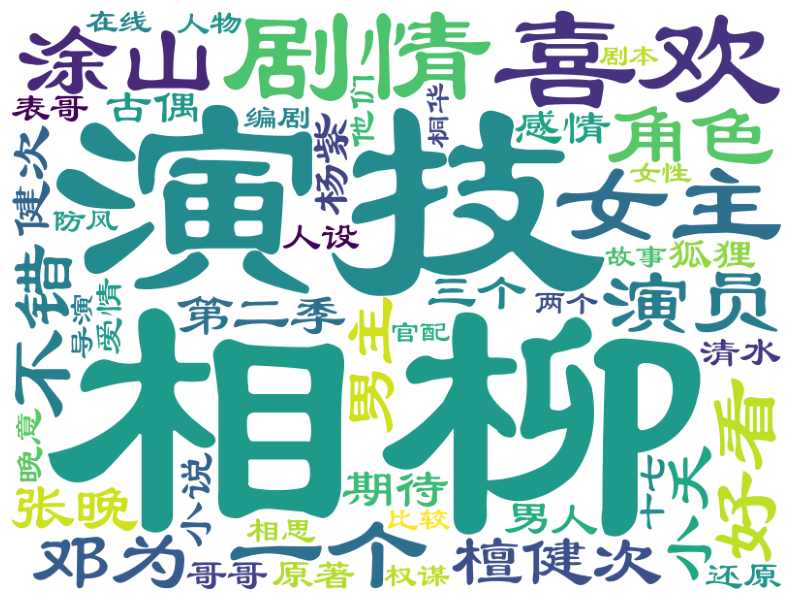

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 生成词云图
wordcloud = WordCloud(background_color="white", width=800, height=600, font_path='HGLS_CNKI.TTF')
wordcloud.generate_from_frequencies(dict(wordsDict_seq[:50]))

# 显示词云图
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
!pip install snownlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760946 sha256=66bf24f85b0ee5e36530e37c762fb4c2898221a62c1aca582b569a795a353f8d
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built snownlp


In [14]:
import pandas as pd

data = danmus_list  # 将DataFrame赋值给'data'变量
data = pd.DataFrame(data, columns=['评论内容'])  # 将列表转换为DataFrame
# 使用snownlp对每条评论进行评分

from snownlp import SnowNLP
import numpy as np
import pandas as pd

# 假设你的代码的其余部分已经正确导入了所需的库

def sent_score(comm):
    sents = SnowNLP(comm).sentences
    sent_score = np.mean([SnowNLP(sent).sentiments for sent in sents])
    return sent_score

# 假设你已经定义并初始化了'data'变量

data['comm_sent_score'] = data['评论内容'].map(sent_score)


In [15]:
data.sample(10)

,评论内容,comm_sent_score
200,能理解为啥女主选择涂山璟，但就是不喜欢这类男主。,0.793936
438,我趣啊啊啊啊啊啊啊啊啊啊啊啊啊啊檀健次太帅了啊啊狠狠get到檀健次的颜了，天选相柳！！！,0.930988
213,我看了个啥？古偶越来越为了虐了虐……,0.790351
24,咬脖子是性的暗示吗？这么幼稚的剧情，我也是服了，真是应了那句话，中国最封建的地方就是电视剧里...,0.618649
226,这剧最神奇的是几个男主的线捋的都很清楚，每段关系都有非常合理的开始、发现，而且出来一个我磕一...,0.628753
279,本来看到太多营销不想看，后面看了剪辑觉得不错，就追了，结果一看就上头，不过第一季这个结局戛然...,0.664402
415,过程很美丽就可以,0.969002
450,相柳真的好喜欢?啊啊啊啊真的好喜欢相柳！！！,0.999876
577,期待第二部,0.679437
428,这杨紫对得起自己的名字，越来越上头,0.618692


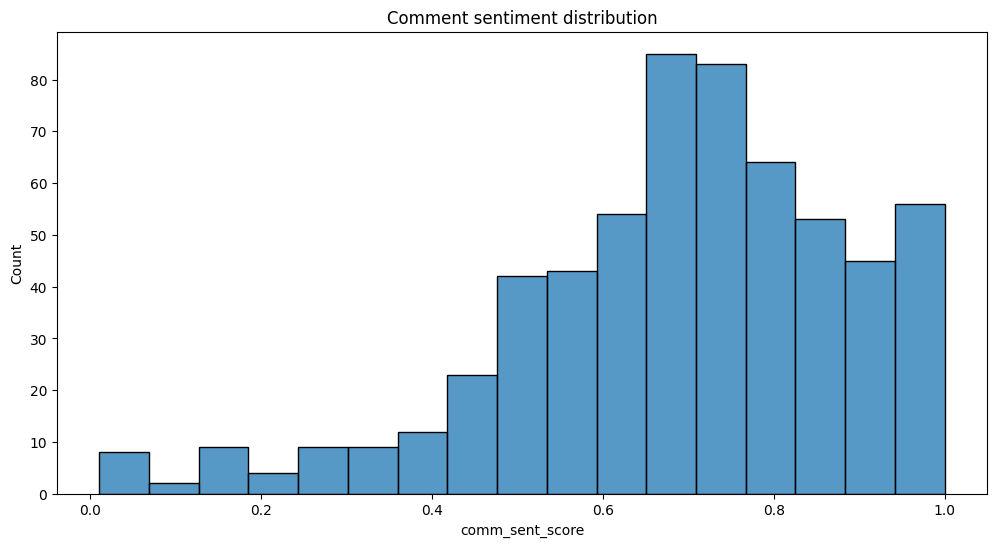

In [16]:
# 查看情感评分的分布情况

import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的代码的其他部分已经正确导入了所需的库

plt.figure(figsize=(12, 6))
sns.histplot(data['comm_sent_score'], kde=False)
plt.title('Comment sentiment distribution')
plt.show()

In [17]:
h_data = data[data.comm_sent_score>=0.7]
l_data = data[data.comm_sent_score<0.7]

In [18]:
print(h_data.shape)
print(l_data.shape)

(312, 2)
(289, 2)


In [19]:
# 导出h_data为CSV文件
h_data.to_csv('h_data.csv', index=False)

In [20]:
with open('h_data.csv','r',encoding='utf-8') as f:
    list_h=list(csv.reader(f))
# print(type(list_h))

In [21]:
danmus_list_h=[str(list_h).replace(' ','')]
# print(danmus_list_h)

In [22]:
danmus_seg=''.join(danmus_list_h) # 将文本数据转换为字符串格式
words=list(jieba.lcut(danmus_seg)) # 利用jieba库进行分词
print(type(words),words)

<class 'list'> ['[', '[', "'", '评论', '内容', "'", ',', "'", 'comm', '_', 'sent', '_', 'score', "'", ']', ',', '[', "'", '上古', '《', '布里奇顿', '》', '，', '几', '对', '二代', '祖哥妹', '的', '联姻', '社交', '季', '（', '从此', '恐哥妹', '了', '…', '…', '…', '…', '…', '薅', '，', '窝素', '相柳', '大人', '单推', '、', '、', '、', '檀', '老师', '非常', '好', '、', '、', "'", ',', "'", '0.8970023578177061', "'", ']', ',', '[', "'", '弃剧', '：', '看到', '第三集', '，', '感觉', '这', '剧情', '和', '魔幻', '仙侠', '设定', '实在', '是', '没法', '入戏', '。', "'", ',', "'", '0.8499610736002603', "'", ']', ',', '[', "'", '这个', '故事', '设定', '十分', '诡异', '。', '男一', '主要', '负责', '给', '女主', '提供', '物质', '保障', '和', '生命安全', '，', '男二', '主要', '负责', '给', '女主', '提供', '情感', '价值', '和', '陪伴', '功能', '，', '男三', '主要', '负责', '给', '女主加', '武力', '值和空', '档期', '解闷', '…', '男四', '主要', '为了', '烘托', '其他', '几个', '男人', '并且', '最后', '挂', '了', '。', '看似', '核心', '价值', '描述', '十分', '物化', '里面', '的', '女性', '角色', '（', '经常', '拿来', '做', '仕途', '交换', '）', '但', '实际上', '，', '作者', '本身', '也', '十分', '功能化', '每', '一个', '男性'

In [23]:
danmus_list_h2 = [word for word in words if len(word)>1] # 保留长度>1的变量
print(danmus_list_h2)

['评论', '内容', 'comm', 'sent', 'score', '上古', '布里奇顿', '二代', '祖哥妹', '联姻', '社交', '从此', '恐哥妹', '窝素', '相柳', '大人', '单推', '老师', '非常', '0.8970023578177061', '弃剧', '看到', '第三集', '感觉', '剧情', '魔幻', '仙侠', '设定', '实在', '没法', '入戏', '0.8499610736002603', '这个', '故事', '设定', '十分', '诡异', '男一', '主要', '负责', '女主', '提供', '物质', '保障', '生命安全', '男二', '主要', '负责', '女主', '提供', '情感', '价值', '陪伴', '功能', '男三', '主要', '负责', '女主加', '武力', '值和空', '档期', '解闷', '男四', '主要', '为了', '烘托', '其他', '几个', '男人', '并且', '最后', '看似', '核心', '价值', '描述', '十分', '物化', '里面', '女性', '角色', '经常', '拿来', '仕途', '交换', '实际上', '作者', '本身', '十分', '功能化', '一个', '男性', '角色', '导致', '一个', '角色行为', '动机', '性格', '及其', '所在', '世界', '世界观', '十分', '割裂', '另外', '这个', '故事', '有前', '黄晓明', '宋茜演', '上古', '情歌', '0.898079821469598', '制作', '大女', '主大', 'IP', '演员', '演员', '没拉垮', '0.9831327100431837', '怀念', '桐华', '克制', '言情', '美学', '男转', '台词', '优秀', '脖子', '这种', '播出来', '就是', 'nb', '0.7872706409170271', '这剧', '没意思', '配角', '可爱', '阿念', '赤水', '丰隆', '还有', '相柳', '心痛', '每个', '付出', '看见', '相柳', '汹涌', 

In [24]:
with open('cn_stopwords.txt','r',encoding='utf-8') as sw:
    stopwords_list=list(csv.reader(sw)) # 打开停用词表并转换为列表格式
outstr='' # 设置空字符串，用于储存停用词表过滤后的分词
for word in danmus_list_h2: # 遍历分词后列表中的每一个单词
    if word not in stopwords_list: # 如果单词不在停用词表中
        if word != '\t': # 如果单词不为制表符
            outstr += word # 将该单词加入字符串中
            outstr += ' ' # 将结果以空格隔开
result_h=outstr.split() # 将结果转换为list格式
print(type(result_h),result_h)

<class 'list'> ['评论', '内容', 'comm', 'sent', 'score', '上古', '布里奇顿', '二代', '祖哥妹', '联姻', '社交', '从此', '恐哥妹', '窝素', '相柳', '大人', '单推', '老师', '非常', '0.8970023578177061', '弃剧', '看到', '第三集', '感觉', '剧情', '魔幻', '仙侠', '设定', '实在', '没法', '入戏', '0.8499610736002603', '这个', '故事', '设定', '十分', '诡异', '男一', '主要', '负责', '女主', '提供', '物质', '保障', '生命安全', '男二', '主要', '负责', '女主', '提供', '情感', '价值', '陪伴', '功能', '男三', '主要', '负责', '女主加', '武力', '值和空', '档期', '解闷', '男四', '主要', '为了', '烘托', '其他', '几个', '男人', '并且', '最后', '看似', '核心', '价值', '描述', '十分', '物化', '里面', '女性', '角色', '经常', '拿来', '仕途', '交换', '实际上', '作者', '本身', '十分', '功能化', '一个', '男性', '角色', '导致', '一个', '角色行为', '动机', '性格', '及其', '所在', '世界', '世界观', '十分', '割裂', '另外', '这个', '故事', '有前', '黄晓明', '宋茜演', '上古', '情歌', '0.898079821469598', '制作', '大女', '主大', 'IP', '演员', '演员', '没拉垮', '0.9831327100431837', '怀念', '桐华', '克制', '言情', '美学', '男转', '台词', '优秀', '脖子', '这种', '播出来', '就是', 'nb', '0.7872706409170271', '这剧', '没意思', '配角', '可爱', '阿念', '赤水', '丰隆', '还有', '相柳', '心痛', '每个', '付出', '看见

In [25]:
wordsDict_h = {} #新建字典用于储存词及词频
for word in words:
    if len(word) == 1: #单个的字符不作为词放入字典
        continue
    else:
        wordsDict_h.setdefault(word, 0) #设置词的初始出现次数为0
        wordsDict_h[word] +=1 #对于重复出现的词，每出现一次，次数增加1

wordsDict_h_seq = sorted(wordsDict_h.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_h_seq[:100]

[('相柳', 114),
 ('演技', 82),
 ('喜欢', 68),
 ('但是', 56),
 ('女主', 54),
 ('不错', 52),
 ('剧情', 50),
 ('真的', 49),
 ('演员', 47),
 ('就是', 44),
 ('角色', 43),
 ('涂山', 33),
 ('好看', 31),
 ('可以', 31),
 ('还是', 30),
 ('一个', 29),
 ('邓为', 28),
 ('男主', 28),
 ('没有', 28),
 ('第二季', 27),
 ('健次', 27),
 ('期待', 25),
 ('原著', 23),
 ('感觉', 22),
 ('这个', 22),
 ('狐狸', 22),
 ('感情', 22),
 ('小说', 22),
 ('张晚', 21),
 ('檀健次', 21),
 ('虽然', 20),
 ('觉得', 20),
 ('哥哥', 19),
 ('这部', 19),
 ('小夭', 19),
 ('还原', 18),
 ('古偶', 18),
 ('爱情', 18),
 ('不是', 17),
 ('杨紫', 17),
 ('有点', 17),
 ('故事', 16),
 ('桐华', 16),
 ('其实', 16),
 ('确实', 16),
 ('因为', 16),
 ('相思', 16),
 ('看到', 15),
 ('男人', 15),
 ('还有', 15),
 ('时候', 15),
 ('自己', 15),
 ('比较', 15),
 ('三个', 15),
 ('人物', 14),
 ('开始', 14),
 ('他们', 14),
 ('啊啊啊', 14),
 ('知道', 14),
 ('不能', 13),
 ('人设', 13),
 ('晚意', 13),
 ('清水', 13),
 ('真是', 13),
 ('隐忍', 13),
 ('这么', 13),
 ('非常', 12),
 ('为了', 12),
 ('最后', 12),
 ('女性', 12),
 ('这种', 12),
 ('后面', 12),
 ('一直', 12),
 ('导演', 12),
 ('情感', 11),
 ('防风', 11),
 ('应该', 

In [28]:
stopWords = ["真的","就是","但是","还是","可以","没有","这个","后面","自己","有点","感觉","不是","这部","因为","觉得","什么","不能","看到","虽然","一直","还有","其实","这么","确实","时候","怎么","开始","知道","最后","那么","非常","之后","这种","这样","部分","为了","其他","很多","不行","现在","所以","一点","get","已经","真是","如果","除了","不过","而且","几个","然后","为什么","发现","看过","完全","可能","出来","应该","有些","那样","一样","居然","越来越","看着","下去","实在","那个","只有","竟然","起来","只能","不了","不想","里面"]
for word in stopWords:
    if word in wordsDict_h:
        del wordsDict_h[word] #删除对应的词

wordsDict_h_seq = sorted(wordsDict_h.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_h_seq[:50]

[('相柳', 114),
 ('演技', 82),
 ('喜欢', 68),
 ('女主', 54),
 ('不错', 52),
 ('剧情', 50),
 ('演员', 47),
 ('角色', 43),
 ('涂山', 33),
 ('好看', 31),
 ('一个', 29),
 ('邓为', 28),
 ('男主', 28),
 ('第二季', 27),
 ('健次', 27),
 ('期待', 25),
 ('原著', 23),
 ('狐狸', 22),
 ('感情', 22),
 ('小说', 22),
 ('张晚', 21),
 ('檀健次', 21),
 ('哥哥', 19),
 ('小夭', 19),
 ('还原', 18),
 ('古偶', 18),
 ('爱情', 18),
 ('杨紫', 17),
 ('故事', 16),
 ('桐华', 16),
 ('相思', 16),
 ('男人', 15),
 ('比较', 15),
 ('三个', 15),
 ('人物', 14),
 ('他们', 14),
 ('啊啊啊', 14),
 ('人设', 13),
 ('晚意', 13),
 ('清水', 13),
 ('隐忍', 13),
 ('女性', 12),
 ('导演', 12),
 ('情感', 11),
 ('防风', 11),
 ('权谋', 11),
 ('特别', 11),
 ('主演', 11),
 ('两个', 11),
 ('在线', 11)]

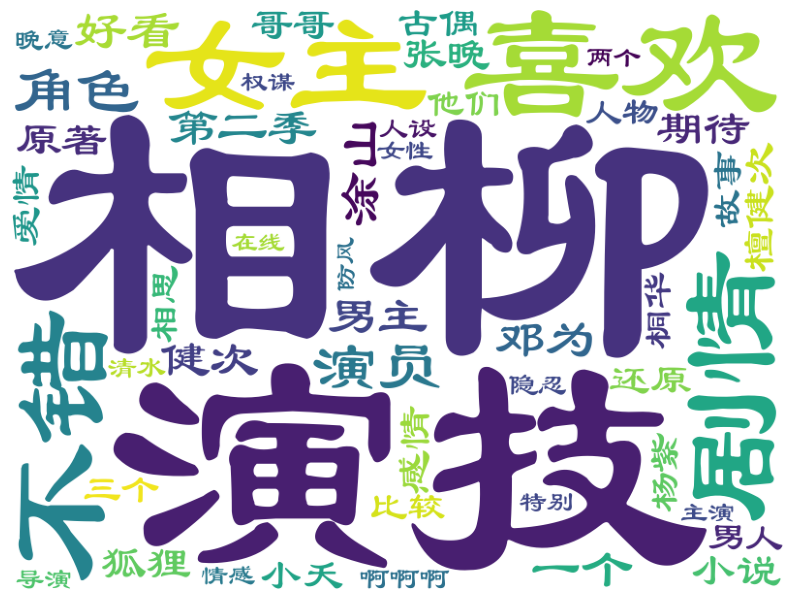

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 生成词云图
wordcloud = WordCloud(background_color="white", width=800, height=600, font_path='HGLS_CNKI.TTF')
wordcloud.generate_from_frequencies(dict(wordsDict_h_seq[:50]))

# 显示词云图
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
# 导出h_data为CSV文件
l_data.to_csv('l_data.csv', index=False)

In [31]:
with open('l_data.csv','r',encoding='utf-8') as f:
    list_l=list(csv.reader(f))
# print(type(list_l))

In [32]:
danmus_list_l=[str(list_l).replace(' ','')]
# print(danmus_list_l)

In [33]:
danmus_seg=''.join(danmus_list_l) # 将文本数据转换为字符串格式
words=list(jieba.lcut(danmus_seg)) # 利用jieba库进行分词
print(type(words),words)

<class 'list'> ['[', '[', "'", '评论', '内容', "'", ',', "'", 'comm', '_', 'sent', '_', 'score', "'", ']', ',', '[', "'", '评论', '内容', "'", ',', "'", '0.30925383096110126', "'", ']', ',', '[', "'", '没什么', '特别', '能', '说', '的', '了', '，', '也', '找', '不到', '能', '评价', '的话', '了', '，', '谢谢', '檀健次', '演', '了', '相柳', '，', '谢谢', '。', "'", ',', "'", '0.49437223954943155', "'", ']', ',', '[', "'", '说出', '我', '一直', '都', '是', '一个', '人', '的', '小六好', '让', '人', '心疼', '，', '她', '的', '家', '早就', '在', '三百年', '前', '分崩离析', '了', '555', "'", ',', "'", '0.35635099093569145', "'", ']', ',', '[', "'", '真的', '很', '还原', '原著', '啊', '！', '张晚', '意演', '的', '玱', '玹', '，', '眼神', '戏', '真的', '很绝', '！', "'", ',', "'", '0.6911979834978247', "'", ']', ',', '[', "'", '天天', '在', '微博抖', '音刷', '，', '为了', '邓为', '，', '还充', '了', '一个月', '腾讯', '会员', '。', '一集', '不', '落', '，', '从', '第一集', '看到', '最后', '一集', '。', '非常', '还原', '小说', '，', '一看', '，', '编剧', '就是', '桐大', '本人', '。', '三大', '男主', '都', '是', '天选', '。', '璟', '就是', '太', '善良', '了', '，', '我', '

In [34]:
danmus_list_l2 = [word for word in words if len(word)>1] # 保留长度>1的变量
print(danmus_list_l2)

['评论', '内容', 'comm', 'sent', 'score', '评论', '内容', '0.30925383096110126', '没什么', '特别', '不到', '评价', '的话', '谢谢', '檀健次', '相柳', '谢谢', '0.49437223954943155', '说出', '一直', '一个', '小六好', '心疼', '早就', '三百年', '分崩离析', '555', '0.35635099093569145', '真的', '还原', '原著', '张晚', '意演', '眼神', '真的', '很绝', '0.6911979834978247', '天天', '微博抖', '音刷', '为了', '邓为', '还充', '一个月', '腾讯', '会员', '一集', '第一集', '看到', '最后', '一集', '非常', '还原', '小说', '一看', '编剧', '就是', '桐大', '本人', '三大', '男主', '天选', '就是', '善良', '希望', '永远', '清水', '十七', '相柳', '就是', '太重', '情意', '长嘴', '那么', '多事', '喜欢', '防风', '表哥', '喜欢', '开始', '没长眼', '认不出', '小夭', '后来', '看不清', '如愿', '帝王', '心想', '霸占', '小夭', '气死', 'OST', '首首', '经典', '丰隆', '搞笑', '担当', '剧本', '眼光', '问题', '希望', '你们', '仨别', '王楚然', '祸祸', '0.6137451971354292', '国产', '编剧', '地下室', '之作', '别说', '什么', '叙事', '角色', '基本', '情节', '连贯', '一致', '不到', '数数看', '光是', '第一集', '几次', '国王', '两个', '儿子', '先后', '死亡', '太后', '亲口', '盖章', '确认', '孙子', '唯一', '男丁', '转场', '几个', '知道', '哪里', '冒出来', '野孩子', '居然', '欺负', '这个', '王位', '唯一', '继承人', '没父', 

In [35]:
with open('cn_stopwords.txt','r',encoding='utf-8') as sw:
    stopwords_list=list(csv.reader(sw)) # 打开停用词表并转换为列表格式
outstr='' # 设置空字符串，用于储存停用词表过滤后的分词
for word in danmus_list_l2: # 遍历分词后列表中的每一个单词
    if word not in stopwords_list: # 如果单词不在停用词表中
        if word != '\t': # 如果单词不为制表符
            outstr += word # 将该单词加入字符串中
            outstr += ' ' # 将结果以空格隔开
result_l=outstr.split() # 将结果转换为list格式
print(type(result_l),result_l)

<class 'list'> ['评论', '内容', 'comm', 'sent', 'score', '评论', '内容', '0.30925383096110126', '没什么', '特别', '不到', '评价', '的话', '谢谢', '檀健次', '相柳', '谢谢', '0.49437223954943155', '说出', '一直', '一个', '小六好', '心疼', '早就', '三百年', '分崩离析', '555', '0.35635099093569145', '真的', '还原', '原著', '张晚', '意演', '眼神', '真的', '很绝', '0.6911979834978247', '天天', '微博抖', '音刷', '为了', '邓为', '还充', '一个月', '腾讯', '会员', '一集', '第一集', '看到', '最后', '一集', '非常', '还原', '小说', '一看', '编剧', '就是', '桐大', '本人', '三大', '男主', '天选', '就是', '善良', '希望', '永远', '清水', '十七', '相柳', '就是', '太重', '情意', '长嘴', '那么', '多事', '喜欢', '防风', '表哥', '喜欢', '开始', '没长眼', '认不出', '小夭', '后来', '看不清', '如愿', '帝王', '心想', '霸占', '小夭', '气死', 'OST', '首首', '经典', '丰隆', '搞笑', '担当', '剧本', '眼光', '问题', '希望', '你们', '仨别', '王楚然', '祸祸', '0.6137451971354292', '国产', '编剧', '地下室', '之作', '别说', '什么', '叙事', '角色', '基本', '情节', '连贯', '一致', '不到', '数数看', '光是', '第一集', '几次', '国王', '两个', '儿子', '先后', '死亡', '太后', '亲口', '盖章', '确认', '孙子', '唯一', '男丁', '转场', '几个', '知道', '哪里', '冒出来', '野孩子', '居然', '欺负', '这个', '王位', '唯一'

In [36]:
wordsDict_l = {} #新建字典用于储存词及词频
for word in words:
    if len(word) == 1: #单个的字符不作为词放入字典
        continue
    else:
        wordsDict_l.setdefault(word, 0) #设置词的初始出现次数为0
        wordsDict_l[word] +=1 #对于重复出现的词，每出现一次，次数增加1

wordsDict_l_seq = sorted(wordsDict_l.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_l_seq[:100]

[('相柳', 76),
 ('剧情', 52),
 ('一个', 49),
 ('演技', 49),
 ('喜欢', 47),
 ('涂山', 47),
 ('女主', 46),
 ('真的', 44),
 ('还是', 39),
 ('就是', 38),
 ('好看', 37),
 ('没有', 31),
 ('后面', 27),
 ('邓为', 26),
 ('但是', 26),
 ('檀健次', 24),
 ('小夭', 24),
 ('自己', 24),
 ('张晚', 21),
 ('有点', 21),
 ('不是', 21),
 ('什么', 20),
 ('这个', 19),
 ('因为', 19),
 ('这部', 18),
 ('三个', 17),
 ('不能', 17),
 ('演员', 17),
 ('怎么', 17),
 ('一直', 16),
 ('男主', 16),
 ('男人', 16),
 ('杨紫', 16),
 ('感觉', 16),
 ('清水', 15),
 ('那么', 15),
 ('表哥', 15),
 ('这么', 15),
 ('可以', 15),
 ('觉得', 15),
 ('看到', 14),
 ('十七', 14),
 ('现在', 14),
 ('古偶', 13),
 ('还有', 13),
 ('第二季', 13),
 ('健次', 13),
 ('最后', 12),
 ('如果', 12),
 ('get', 12),
 ('这样', 12),
 ('其实', 12),
 ('确实', 12),
 ('之后', 12),
 ('期待', 12),
 ('一点', 12),
 ('人设', 12),
 ('非常', 11),
 ('编剧', 11),
 ('开始', 11),
 ('角色', 11),
 ('知道', 11),
 ('很多', 11),
 ('晚意', 11),
 ('越来越', 11),
 ('时候', 11),
 ('其他', 11),
 ('然后', 11),
 ('部分', 11),
 ('居然', 10),
 ('夭柳', 10),
 ('为什么', 10),
 ('所以', 10),
 ('已经', 10),
 ('这种', 10),
 ('不想', 10),
 ('感情',

In [37]:
stopWords = ["真的","就是","但是","还是","可以","没有","这个","后面","自己","有点","感觉","不是","这部","因为","觉得","什么","不能","看到","虽然","一直","还有","其实","这么","确实","时候","怎么","开始","知道","最后","那么","非常","之后","这种","这样","部分","为了","其他","很多","不行","现在","所以","一点","get","已经","真是","如果","除了","不过","而且","几个","然后","为什么","发现","看过","完全","可能","出来","应该","有些","那样","一样","居然","越来越","看着","下去","实在","那个","只有","竟然","起来","只能","不了","不想","里面"]
for word in stopWords:
    if word in wordsDict_l:
        del wordsDict_l[word] #删除对应的词

wordsDict_l_seq = sorted(wordsDict_l.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_l_seq[:50]

[('相柳', 76),
 ('剧情', 52),
 ('一个', 49),
 ('演技', 49),
 ('喜欢', 47),
 ('涂山', 47),
 ('女主', 46),
 ('好看', 37),
 ('邓为', 26),
 ('檀健次', 24),
 ('小夭', 24),
 ('张晚', 21),
 ('三个', 17),
 ('演员', 17),
 ('男主', 16),
 ('男人', 16),
 ('杨紫', 16),
 ('清水', 15),
 ('表哥', 15),
 ('十七', 14),
 ('古偶', 13),
 ('第二季', 13),
 ('健次', 13),
 ('期待', 12),
 ('人设', 12),
 ('编剧', 11),
 ('角色', 11),
 ('晚意', 11),
 ('夭柳', 10),
 ('感情', 10),
 ('在线', 10),
 ('这剧', 10),
 ('小说', 9),
 ('希望', 9),
 ('防风', 9),
 ('官配', 9),
 ('不错', 9),
 ('结果', 9),
 ('权谋', 9),
 ('他们', 9),
 ('一起', 9),
 ('狐狸', 9),
 ('哥哥', 9),
 ('以后', 9),
 ('两个', 8),
 ('之前', 8),
 ('前面', 8),
 ('难看', 8),
 ('第二部', 8),
 ('特效', 8)]

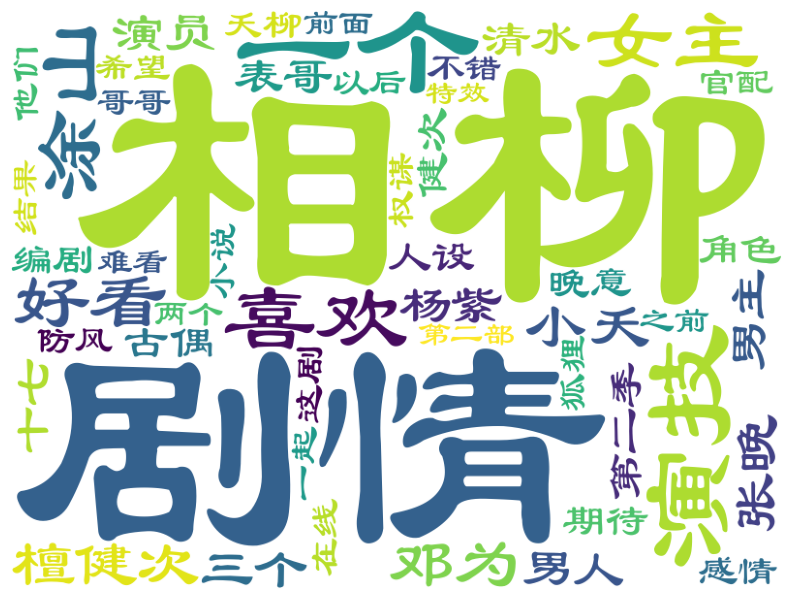

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 生成词云图
wordcloud = WordCloud(background_color="white", width=800, height=600, font_path='HGLS_CNKI.TTF')
wordcloud.generate_from_frequencies(dict(wordsDict_l_seq[:50]))

# 显示词云图
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()